In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV

In [30]:
train_df = pd.read_csv('./data/train.csv')

In [31]:
print(f"TRAIN features: {len(train_df.columns)}")
print(f"TRAIN rows: {len(train_df.index)}")
print(f"적정 feature 개수: {len(train_df.index) // 300} ~ {len(train_df.index) // 50}")
print()
train_df.info()

TRAIN features: 10
TRAIN rows: 30858
적정 feature 개수: 102 ~ 617

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30858 entries, 0 to 30857
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 30858 non-null  object 
 1   age                30858 non-null  float64
 2   gender             30858 non-null  object 
 3   tenure             30858 non-null  float64
 4   frequent           30858 non-null  float64
 5   payment_interval   30858 non-null  float64
 6   subscription_type  30858 non-null  object 
 7   contract_length    30858 non-null  int64  
 8   after_interaction  30858 non-null  float64
 9   support_needs      30858 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 2.4+ MB


In [32]:
train_df.drop(columns=["ID"], inplace=True)

In [33]:
train_df.describe()

,age,tenure,frequent,payment_interval,contract_length,after_interaction,support_needs
count,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000,30858.000000
mean,39.428479,31.250275,15.803876,12.947145,186.643010,14.546147,0.804492
std,12.423977,17.403133,8.612354,8.302702,143.948206,8.599893,0.832419
min,18.000000,1.000000,1.000000,0.000000,30.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,6.000000,90.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,12.000000,90.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,19.000000,360.000000,22.000000,2.000000
max,65.000000,60.000000,30.000000,30.000000,360.000000,30.000000,2.000000


In [34]:
for col in train_df.columns:
    print(f"{col}: {train_df[col].nunique()}")
    print(f"{train_df[col].unique()}")
    print("-----")

age: 48
[54. 30. 29. 38. 25. 53. 55. 40. 42. 35. 23. 36. 31. 64. 21. 37. 41. 32.
 43. 20. 27. 18. 39. 33. 63. 59. 50. 24. 45. 52. 56. 34. 19. 47. 62. 49.
 22. 44. 61. 48. 28. 26. 46. 65. 58. 60. 57. 51.]
-----
gender: 2
['F' 'M']
-----
tenure: 60
[47. 16.  8. 38. 52. 50. 13. 32. 10.  1. 11. 12. 39. 28. 40. 59. 48. 37.
 15. 19.  7. 49.  5. 60. 58. 55.  4. 46. 35. 30. 18. 21. 51. 29. 22. 45.
 57. 17. 27. 34. 23. 42. 31. 14. 26. 24. 20. 53.  6. 54.  2. 25. 36. 33.
 43.  9. 56. 44. 41.  3.]
-----
frequent: 30
[22. 15. 30. 23.  3.  8.  1.  7. 29. 27. 26.  4. 28.  6. 16. 11.  2.  5.
  9. 19. 17. 24. 10. 12. 20. 18. 14. 21. 25. 13.]
-----
payment_interval: 31
[ 8.  5. 21. 10. 17.  4. 19. 27.  0.  1. 15. 11.  3.  6. 28. 22.  9.  7.
 20. 16. 26. 13. 12. 24. 14. 18. 25. 30.  2. 23. 29.]
-----
subscription_type: 3
['member' 'vip' 'plus']
-----
contract_length: 3
[ 90 360  30]
-----
after_interaction: 30
[25. 23. 21.  6.  1. 11.  5.  8. 15. 13. 17. 30. 14. 12. 27. 10.  3. 22.
  2.  7.  4. 24. 26. 

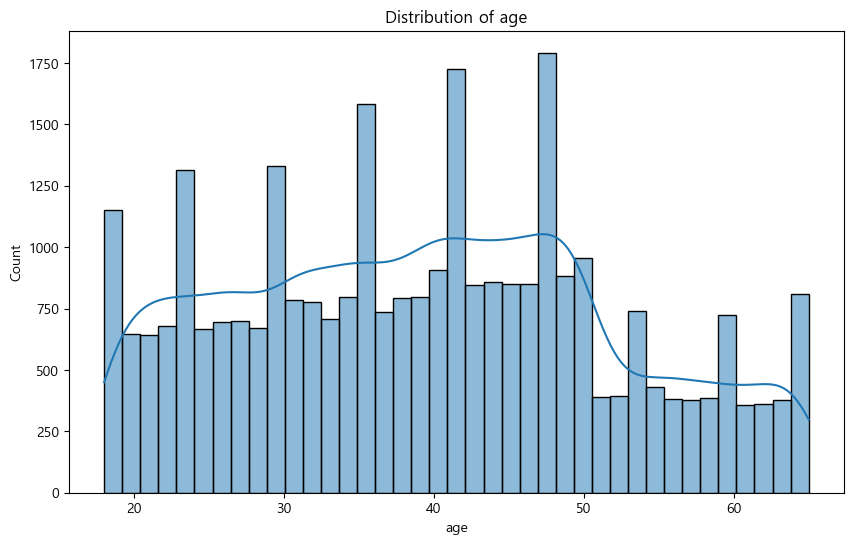

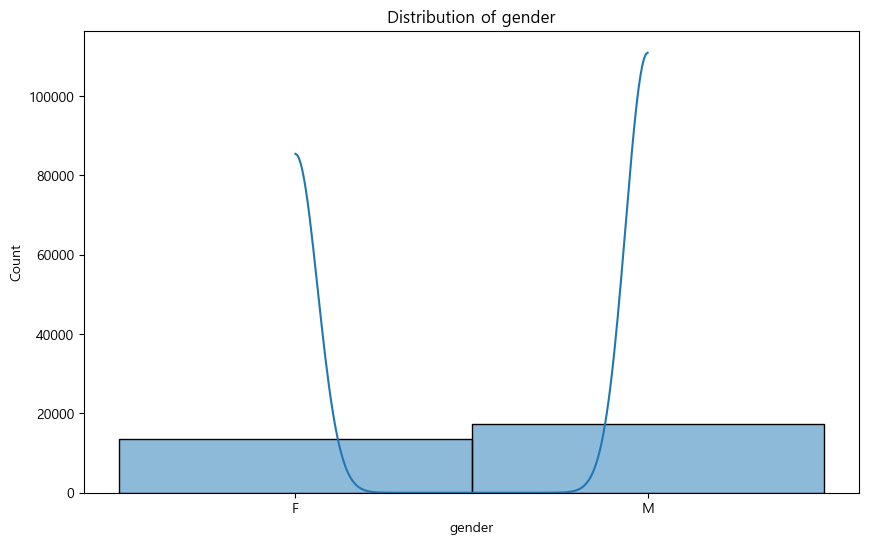

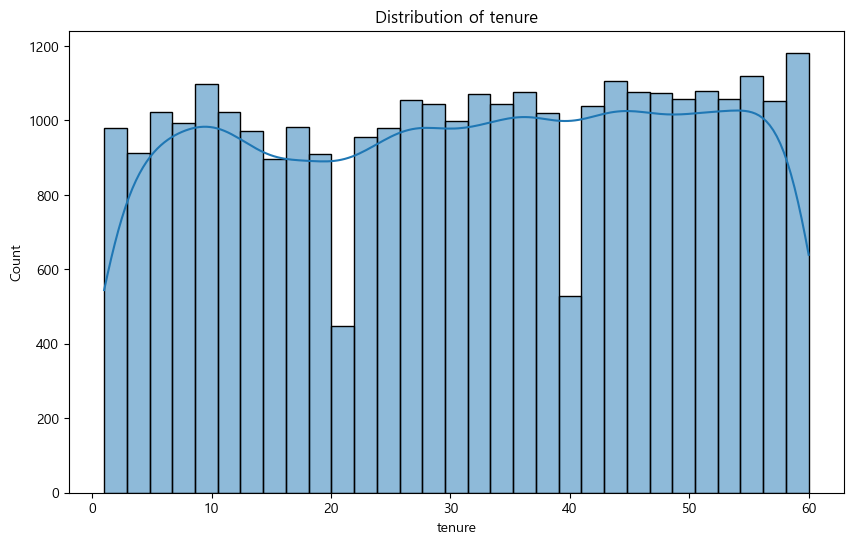

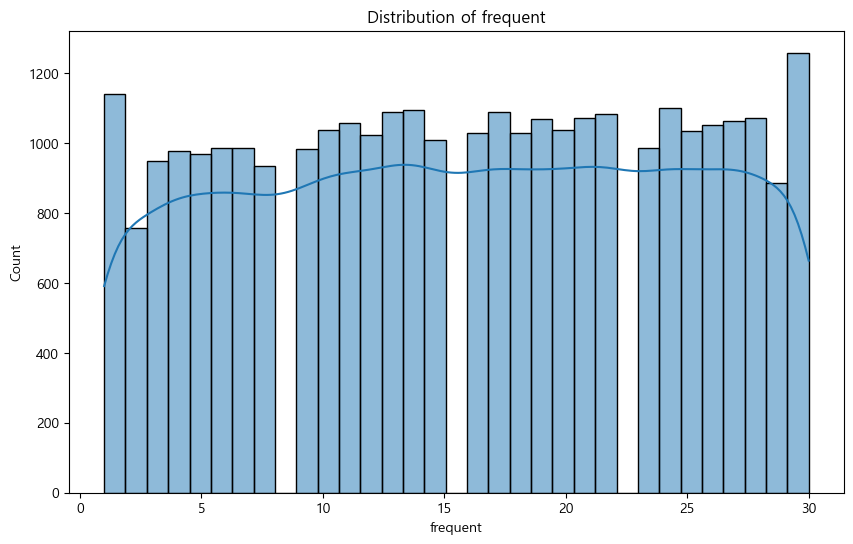

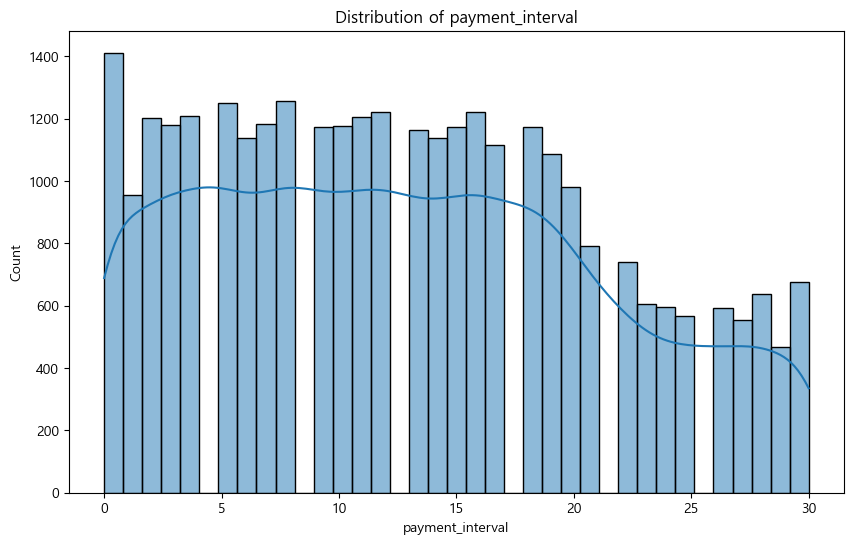

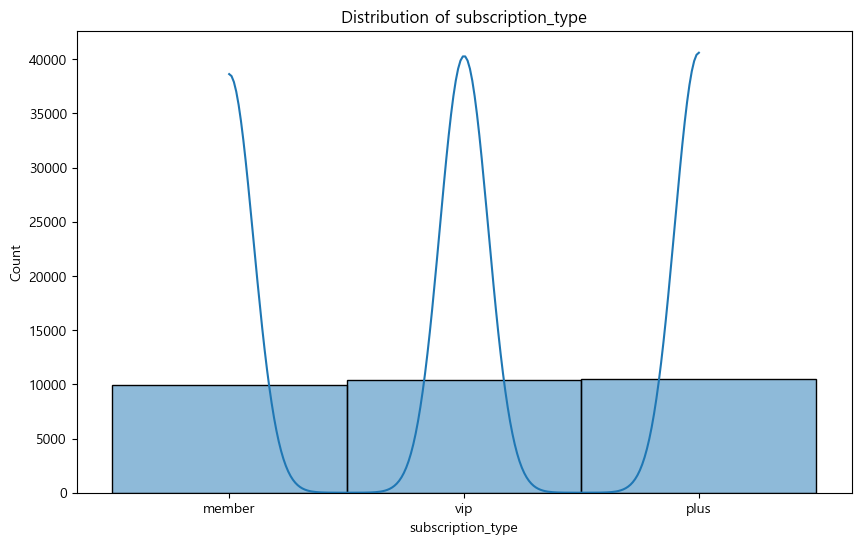

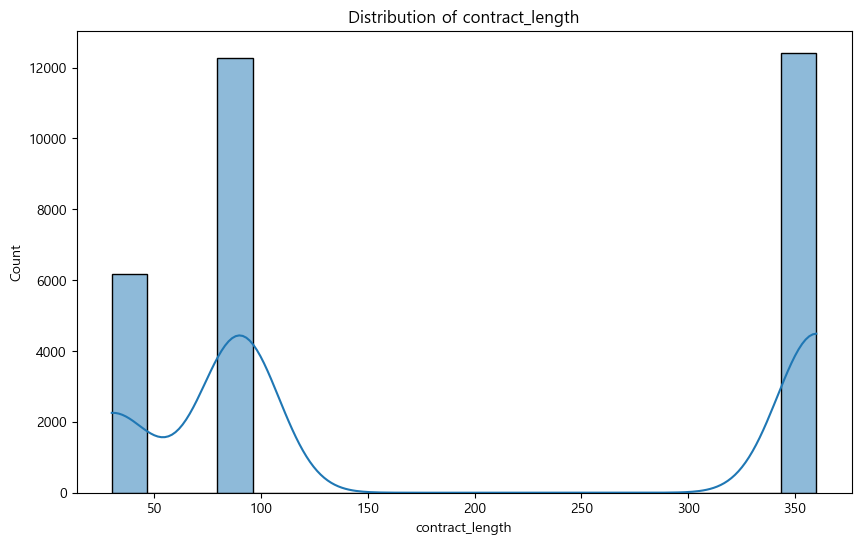

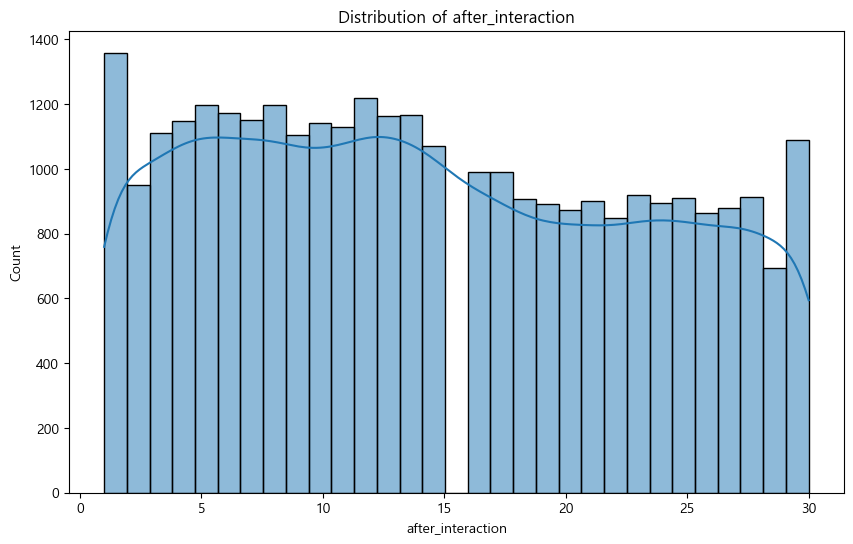

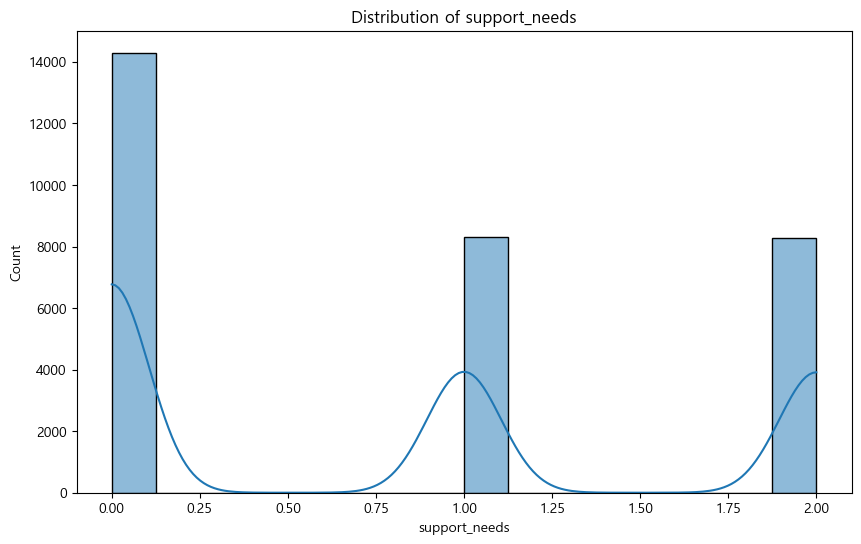

In [35]:
for col in train_df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(train_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)

클래스별 데이터 개수:
support_needs
0    14297
1     8297
2     8264
Name: count, dtype: int64

클래스별 데이터 비율:
support_needs
0    0.463316
1    0.268877
2    0.267807
Name: proportion, dtype: float64


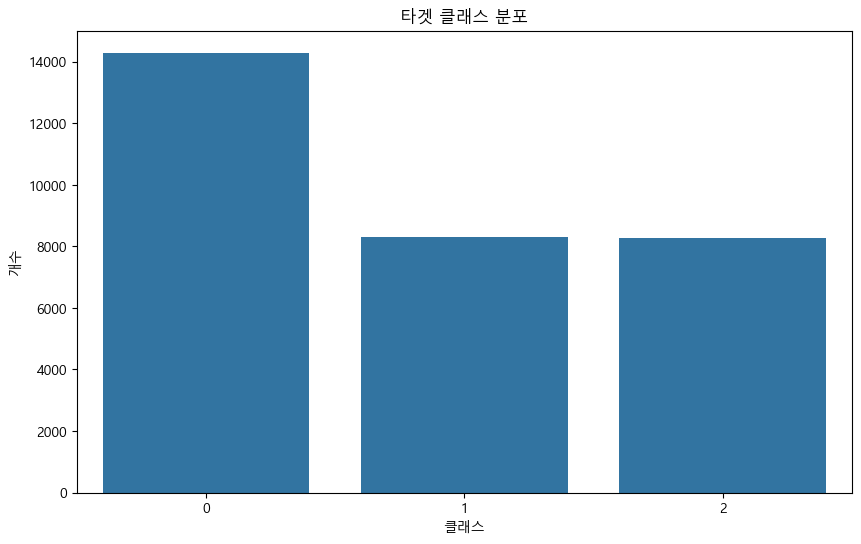

In [38]:
class_counts = train_df['support_needs'].value_counts()
print("클래스별 데이터 개수:")
print(class_counts)

class_ratios = train_df['support_needs'].value_counts(normalize=True)
print("\n클래스별 데이터 비율:")
print(class_ratios)
plt.figure(figsize=(10,6))
sns.countplot(data=train_df, x='support_needs')
plt.title("타겟 클래스 분포")
plt.xlabel("클래스")
plt.ylabel("개수")
plt.show()